In [1]:
import numpy as np
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import os
import re
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image

In [14]:
# declare path variables
# Download ffmpeg from https://ffmpeg.org/download.html
ffmpeg_path = r"E:\tools\ffmpeg\bin\ffmpeg.exe"
img_dir = r"E:\work\Learning\Stanford\CS231N\project\results\book-dataset\Task2\cwgan\sample"
output_animation_file = r"E:\work\Learning\Stanford\CS231N\project\results\book-dataset\Task2\cwgan\animation.mp4"

In [16]:
plt.rcParams['animation.ffmpeg_path'] = ffmpeg_path

In [17]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [18]:
# Sort image files numerically (batches_done) 
img_files = os.listdir(img_dir)
img_files.sort(key=lambda f: int(re.sub('\D', '', f)))
img_files = [os.path.join(img_dir, f) for f in img_files]
print(len(img_files))

225


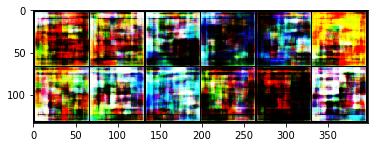

In [19]:
# Load images and convert to tensors
img_list = []
for image in img_files:
    img = Image.open(image)
    trans = transforms.ToTensor()
    img = trans(img)
    img_list.append(img)
imshow(img_list[0])

In [20]:
# Set up formatting for the movie file
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)

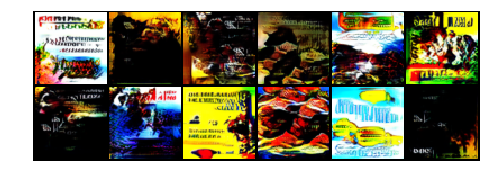

In [21]:
#%%capture
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=500, repeat_delay=3000, blit=True)
ani.save(output_animation_file, writer=writer)

# Uncomment to see animation in notebook
#HTML(ani.to_jshtml())